In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from numpy.random import normal
from scipy.stats import norm
import matplotlib.pyplot as plt

## Estimacion parametrico

/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

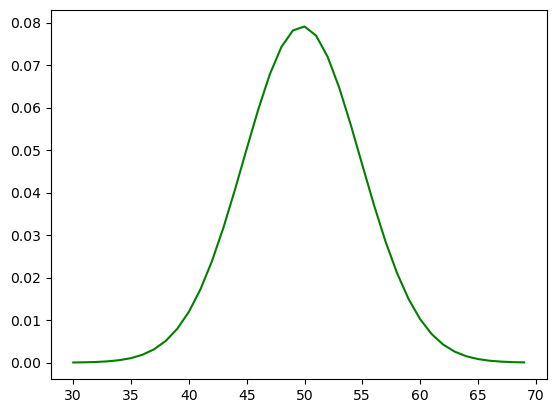

/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


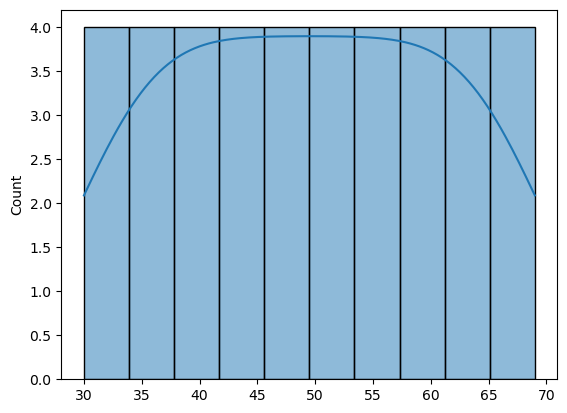

In [18]:
# loc = promediod, scale -> std o desviacion estandar
sample_2 = normal(loc=50,scale=5,size=1000)
miu = sample_2.mean()
std = sample_2.std()

prob, val =np.unique(sample_2/len(sample_2),return_counts=True)
# Pendiente como hacer coincidir las dos graficas
# usando seaborn / En la clase usando matplot lo logran
dist = norm(miu,std)
values = [x for x in range(30,70)]
probabilities = [ dist.pdf(x) for x in values]
# Como usar la funcion unique
#values, proba = np.unique()
sns.lineplot(x=values,y=probabilities, color='green')
plt.show()
sns.histplot(data=values, kde=True, bins=10)
plt.show()

/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/data4if/anaconda3/envs/math/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

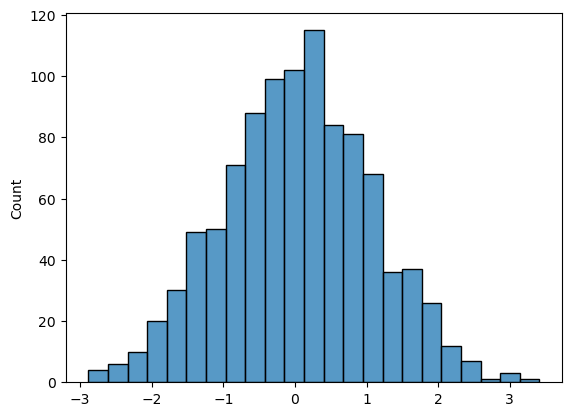

In [53]:
# Datos randon que se generan con una distribucion de
# campana de gauss
sample = normal(size=1000)
sns.histplot(data=sample)

## Estimacion no parametrica

Kernel Density estimation

- [parametro de suavizados]
- [Funcion Base]

Basicamente en sklearn, existen precargadas funciones 
para el suavizado de las funciones de probabiliddad

[22.97784491]
[1]


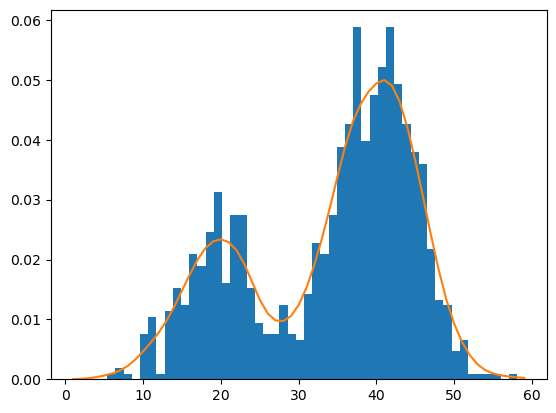

In [95]:
from sklearn.neighbors import KernelDensity

sample_1=normal(loc=20,scale=5, size=300)
sample_2=normal(loc=40,scale=5, size=700)
# Permite juntar arreglos
datos = np.hstack((sample_1,sample_2))
# sns.histplot(data=datos)

#Creando funciones gaussianas como bases
model=KernelDensity(bandwidth=2,kernel='gaussian')
datos = datos.reshape((len(datos), 1))
print(datos[0])
model.fit(datos)

values = np.asarray([x for x in range(1,60)])
values = values.reshape((len(values),1))
print(values[0])
probabilidades = model.score_samples(values) # probabilidades logaritmicas neperianas
probabilidades = np.exp(probabilidades) # inversa de las probabilidades neperianas

plt.hist(datos,bins=50,density=True)
plt.plot(values,probabilidades)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.